In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

tr = 2394
te = 156
day = 10

c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\watso\appd

In [3]:
df = pd.read_csv("stock100_111.csv")
df

,date,Closing price
0,2012/01/02,75.0
1,2012/01/03,75.7
2,2012/01/04,75.8
3,2012/01/05,76.0
4,2012/01/06,75.6
...,...,...
2549,2022/05/27,530.0
2550,2022/05/30,547.0
2551,2022/05/31,560.0
2552,2022/06/01,549.0


In [4]:
train = df['Closing price']
train = train.iloc[0:tr]
train,train.shape

(0        75.0
 1        75.7
 2        75.8
 3        76.0
 4        75.6
         ...  
 2389    594.0
 2390    580.0
 2391    580.0
 2392    574.0
 2393    572.0
 Name: Closing price, Length: 2394, dtype: float64,
 (2394,))

In [5]:
test = df['Closing price']
test = test.iloc[tr:2550]
test,test.shape

(2394    572.0
 2395    571.0
 2396    580.0
 2397    575.0
 2398    575.0
         ...  
 2545    528.0
 2546    520.0
 2547    524.0
 2548    514.0
 2549    530.0
 Name: Closing price, Length: 156, dtype: float64,
 (156,))

In [6]:
train_set = np.array(train)
test_set = np.array(test)
type(train),type(train_set)

(pandas.core.series.Series, numpy.ndarray)

In [7]:
train_set = train_set.reshape(tr,-1)
test_set = test_set.reshape(te,-1)
train_set.shape,test_set.shape

((2394, 1), (156, 1))

In [8]:
test_set

array([[572.],
       [571.],
       [580.],
       [575.],
       [575.],
       [571.],
       [573.],
       [600.],
       [590.],
       [600.],
       [598.],
       [596.],
       [600.],
       [593.],
       [599.],
       [599.],
       [595.],
       [590.],
       [590.],
       [592.],
       [592.],
       [587.],
       [600.],
       [602.],
       [611.],
       [612.],
       [606.],
       [604.],
       [608.],
       [610.],
       [610.],
       [613.],
       [618.],
       [615.],
       [612.],
       [603.],
       [603.],
       [596.],
       [593.],
       [596.],
       [600.],
       [615.],
       [608.],
       [600.],
       [607.],
       [602.],
       [608.],
       [605.],
       [601.],
       [599.],
       [600.],
       [605.],
       [607.],
       [598.],
       [597.],
       [600.],
       [606.],
       [604.],
       [606.],
       [615.],
       [616.],
       [615.],
       [631.],
       [656.],
       [650.],
       [644.],
       [63

In [9]:
sc = MinMaxScaler(feature_range=(0, 1)) 
train_scaled = sc.fit_transform(train_set) 
test_scaled = sc.transform(test_set)
train_scaled,test_scaled

(array([[0.0011692 ],
        [0.0023384 ],
        [0.00250543],
        ...,
        [0.84466344],
        [0.83464172],
        [0.83130115]]),
 array([[0.83130115],
        [0.82963087],
        [0.84466344],
        [0.83631201],
        [0.83631201],
        [0.82963087],
        [0.83297144],
        [0.87806915],
        [0.86136629],
        [0.87806915],
        [0.87472858],
        [0.87138801],
        [0.87806915],
        [0.86637715],
        [0.87639886],
        [0.87639886],
        [0.86971772],
        [0.86136629],
        [0.86136629],
        [0.86470686],
        [0.86470686],
        [0.85635544],
        [0.87806915],
        [0.88140972],
        [0.89644229],
        [0.89811258],
        [0.88809086],
        [0.88475029],
        [0.89143143],
        [0.89477201],
        [0.89477201],
        [0.89978286],
        [0.90813429],
        [0.90312343],
        [0.89811258],
        [0.88308001],
        [0.88308001],
        [0.87138801],
        [0.866377

In [10]:
x_train = []
y_train = []
x_test = []
y_test = []

In [11]:
for i in range(day, len(train_scaled)):
    x_train.append(train_scaled[i - day:i, 0])
    y_train.append(train_scaled[i, 0])

In [12]:
x_train[20],y_train[20]

(array([0.00517789, 0.00534491, 0.00618006, 0.00434274, 0.00384166,
        0.00501086, 0.0070152 , 0.0070152 , 0.00952063, 0.00952063]),
 0.009520628027392675)

In [13]:
np.random.seed(5)
np.random.shuffle(x_train)
np.random.seed(5)
np.random.shuffle(y_train)
tf.random.set_random_seed(5)

In [14]:
x_train[20],y_train[20]

(array([0.28094204, 0.28344747, 0.28177718, 0.28094204, 0.2801069 ,
        0.28845833, 0.29346918, 0.29430433, 0.30098547, 0.3034909 ]),
 0.296809754468014)

In [15]:
#len(x_train),x_test[0]

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
for i in range(day, len(test_set)):
    x_test.append(test_scaled[i - day:i, 0])
    y_test.append(test_scaled[i, 0])

In [18]:
x_test[20],y_test[20]

(array([0.86470686, 0.85635544, 0.87806915, 0.88140972, 0.89644229,
        0.89811258, 0.88809086, 0.88475029, 0.89143143, 0.89477201]),
 0.8947720060130282)

In [19]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],day,1))
x_test = np.reshape(x_test, (x_test.shape[0],day,1))
#x_train = sequence.pad_sequences(x_train, maxlen=5)
#x_test = sequence.pad_sequences(x_test, maxlen=5)

In [21]:
x_train.shape,x_test.shape

((2384, 10, 1), (146, 10, 1))

In [22]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 80,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2384/2384 [==============================] - 1s 628us/step - loss: 0.0314 - accuracy: 8.3893e-04
Epoch 2/100
2384/2384 [==============================] - 1s 388us/step - loss: 8.1057e-04 -

2384/2384 [==============================] - 1s 400us/step - loss: 2.3254e-04 - accuracy: 8.3893e-04
Epoch 63/100
2384/2384 [==============================] - 1s 399us/step - loss: 1.8060e-04 - accuracy: 8.3893e-04
Epoch 64/100
2384/2384 [==============================] - 1s 395us/step - loss: 1.9446e-04 - accuracy: 8.3893e-04
Epoch 65/100
2384/2384 [==============================] - 1s 394us/step - loss: 1.8204e-04 - accuracy: 8.3893e-04
Epoch 66/100
2384/2384 [==============================] - 1s 393us/step - loss: 1.7026e-04 - accuracy: 8.3893e-04
Epoch 67/100
2384/2384 [==============================] - 1s 394us/step - loss: 1.6887e-04 - accuracy: 8.3893e-04
Epoch 68/100
2384/2384 [==============================] - 1s 395us/step - loss: 1.8278e-04 - accuracy: 8.3893e-04
Epoch 69/100
2384/2384 [==============================] - 1s 400us/step - loss: 1.9296e-04 - accuracy: 8.3893e-040s - loss: 1.9624e-04 - accuracy: 0.
Epoch 70/100
2384/2384 [==============================] - 1s 400u

In [24]:
predict_stock = model.predict(x_test)
predict_stock = sc.inverse_transform(predict_stock)

In [25]:
type(predict_stock)

numpy.ndarray

In [26]:
test_set[0:te-day].shape

(146, 1)

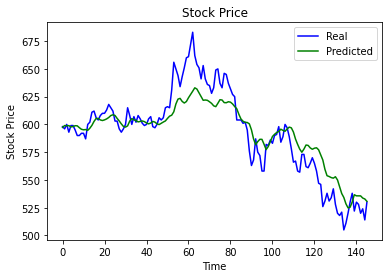

In [27]:
plt.plot(test_set[day:te], color = 'blue', label = 'Real')
plt.plot(predict_stock, color = 'green', label = 'Predicted')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
model.save('stock_10.h')